<a href="https://colab.research.google.com/github/Siboham2510/Financial-Forecasting-UID62/blob/main/Assignment%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving assign6.csv to assign6.csv


In [23]:
import pandas as pd
import numpy as np
# Load the data
df = pd.read_csv('assign6.csv')

# Ensure 'price' and 'alpha' columns exist
if 'price' not in df.columns or 'alpha' not in df.columns:
    raise ValueError("The CSV file must contain 'price' and 'alpha' columns.")

In [3]:
df

,serial_num,price,alpha
0,0,18105.300781,0.000000
1,1,18398.960605,-0.630291
2,2,18204.939538,-0.123420
3,3,18339.357782,-0.240239
4,4,18578.084798,-0.612625
...,...,...,...
5995,5995,7035.576315,-0.318083
5996,5996,7232.249459,-0.199650
5997,5997,7224.645159,-0.076274
5998,5998,7167.188831,1.106138


In [36]:
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution


In [38]:
def dual_threshold_strategy(df, L, B):
    position = 0  # 1 for long, -1 for short, 0 for no position
    entry_price = 0
    pnl = 0
    pnl_history = []

    for index, row in df.iterrows():
        alpha = row['alpha']
        price = row['price']

        if position == 0:
            if alpha > B:
                position = 1
                entry_price = price
            elif alpha < -B:
                position = -1
                entry_price = price
        elif position == 1:
            if alpha < L:
                pnl += price - entry_price
                position = 0
        elif position == -1:
            if alpha > -L:
                pnl += entry_price - price
                position = 0

        pnl_history.append(pnl)

    return pnl_history

In [39]:
def objective(thresholds, df):
    L, B = thresholds
    if L >= B:  # Penalize solutions where L >= B
        return -np.inf
    pnl_history = dual_threshold_strategy(df, L, B)
    final_pnl = pnl_history[-1] if pnl_history else 0
    return -final_pnl  # Negative because we want to maximize PnL


In [40]:
# Define bounds
bounds = [(0.01, 0.5), (0.05, 1.0)]  # Wider bounds for L and B

# Using differential_evolution for global optimization
result = differential_evolution(objective, bounds, args=(df,),
                                  maxiter=100, popsize=15)  # Adjust parameters as needed

optimal_L, optimal_B = result.x
print(f"Optimal L: {optimal_L:.4f}, Optimal B: {optimal_B:.4f}")

Optimal L: 0.3436, Optimal B: 0.2187


In [41]:
# Run the strategy with optimal thresholds
pnl_history = dual_threshold_strategy(df, optimal_L, optimal_B)
final_pnl = pnl_history[-1] if pnl_history else 0
print(f"Final Net PnL: {final_pnl:.2f}")


Final Net PnL: 24564.33


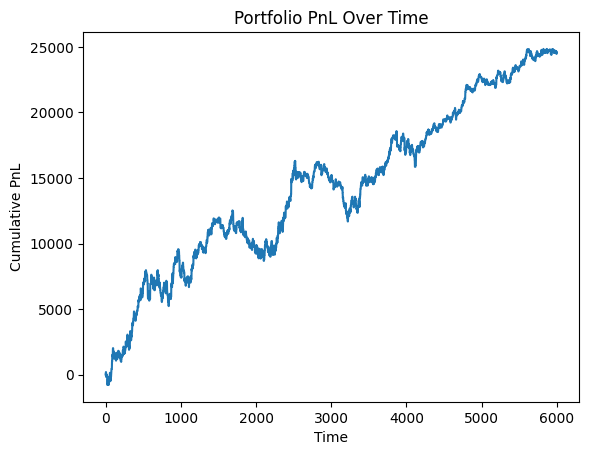

In [42]:
# Plot PnL over time
plt.plot(pnl_history)
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.title('Portfolio PnL Over Time')
plt.show()